In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

ModuleNotFoundError: No module named 'Spectrogram'

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
t_start = time.time()
mel_layer = Spectrogram.CQT2010(sr=44100, n_bins=84*2, bins_per_octave=24, fmin=55)
time_used = time.time()-t_start
print(time_used)

Low pass filter created, time used = 4.9073 seconds
No early downsampling is required, downsample_factor =  1
Early downsampling filter created, time used = 0.0001 seconds
CQT kernels created, time used = 0.0100 seconds
STFT kernels created, time used = 0.0159 seconds
4.93527889251709


In [4]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [5]:
timing = []

for e in range(20):
    t_start = time.time()
    spec = mel_layer(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

0.06167340278625488
0.008727550506591797
0.007148265838623047
0.007112026214599609
0.006875514984130859
0.006694793701171875
0.06199359893798828
0.3856081962585449
0.3844902515411377
0.38518691062927246
0.3853027820587158
0.38465023040771484
0.38424158096313477
0.3824143409729004
0.38391685485839844
0.38448619842529297
0.38633084297180176
0.38367199897766113
0.38396573066711426
0.3848848342895508


In [6]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.25796879529953004
std =  0.17311759643955973


In [7]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'

In [8]:
data.to_csv('CQT_torch_GPU')

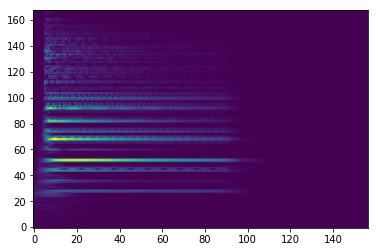

In [9]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')